In [91]:
# Import dependencies and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [55]:
# Load datasets into pandas dataframes
csv_path = "dataset/social_media.csv"
social_media_df = pd.read_csv(csv_path)

In [56]:
# Drop na values and unnecessary columns
social_media_df = social_media_df.dropna()
social_media_df = social_media_df.drop(columns=["Timestamp", "3. Relationship Status", "5. What type of organizations are you affiliated with?"])
social_media_df

,1. What is your age?,2. Gender,4. Occupation Status,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Salaried Worker,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,26.0,Female,Salaried Worker,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,29.0,Female,Salaried Worker,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


In [57]:
# Assessing data
social_media_df[["6. Do you use social media?"]].value_counts()

6. Do you use social media?
Yes                            448
No                               3
Name: count, dtype: int64

In [58]:
# Assessing data
social_media_df["8. What is the average time you spend on social media every day?"].unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

In [59]:
# Clean data - rename values
social_media_df["8. What is the average time you spend on social media every day?"] = social_media_df["8. What is the average time you spend on social media every day?"].replace({"Less than an Hour": "0-1", "Between 1 and 2 hours": "1-2", "Between 2 and 3 hours": "2-3", "Between 3 and 4 hours": "3-4", "Between 4 and 5 hours": "4-5", "More than 5 hours": "5+"})
social_media_df

,1. What is your age?,2. Gender,4. Occupation Status,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,University Student,Yes,"Facebook, Instagram",5+,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube",2-3,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Salaried Worker,Yes,"Facebook, Instagram, YouTube",2-3,3,4,3,4,3,4,4,2,4,3,4,4
477,26.0,Female,Salaried Worker,Yes,"Facebook, YouTube",1-2,2,1,2,3,4,4,4,2,4,4,4,1
478,29.0,Female,Salaried Worker,Yes,"Facebook, YouTube",2-3,3,3,4,3,2,3,3,3,4,2,2,2
479,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,2,3,2,3,3,2,2,3,4,4,5,4


In [60]:
# Clean data - rename columns
social_media_cleaned = social_media_df.rename(columns={"8. What is the average time you spend on social media every day?": "8. What is the average time in hours you spend on social media every day?"})
social_media_cleaned

,1. What is your age?,2. Gender,4. Occupation Status,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time in hours you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,University Student,Yes,"Facebook, Instagram",5+,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube",2-3,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Salaried Worker,Yes,"Facebook, Instagram, YouTube",2-3,3,4,3,4,3,4,4,2,4,3,4,4
477,26.0,Female,Salaried Worker,Yes,"Facebook, YouTube",1-2,2,1,2,3,4,4,4,2,4,4,4,1
478,29.0,Female,Salaried Worker,Yes,"Facebook, YouTube",2-3,3,3,4,3,2,3,3,3,4,2,2,2
479,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,2,3,2,3,3,2,2,3,4,4,5,4


In [79]:
# Average values of variables associated with mental health and group by frequency spent using social media
avg_down_freq = social_media_cleaned.groupby(["8. What is the average time in hours you spend on social media every day?"])["18. How often do you feel depressed or down?"].mean()
distracted = social_media_cleaned.groupby(["8. What is the average time in hours you spend on social media every day?"])["10. How often do you get distracted by Social media when you are busy doing something?"].mean()
comparison = social_media_cleaned.groupby(["8. What is the average time in hours you spend on social media every day?"])["15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?"].mean()
sleep = social_media_cleaned.groupby(["8. What is the average time in hours you spend on social media every day?"])["20. On a scale of 1 to 5, how often do you face issues regarding sleep?"].mean()

avg_summary_df = pd.DataFrame({"Mean Depressed Mood Frequency": avg_down_freq,
                               "Mean Distracted by Social Media Frequency": distracted,
                               "Mean Comparison to Others Frequency": comparison,
                               "Mean Sleep Issues Frequency": sleep})

avg_summary_df.reset_index(inplace=True)
avg_summary_df

,8. What is the average time in hours you spend on social media every day?,Mean Depressed Mood Frequency,Mean Distracted by Social Media Frequency,Mean Comparison to Others Frequency,Mean Sleep Issues Frequency
0,0-1,2.000000,1.848485,2.181818,2.515152
1,1-2,2.800000,2.723077,2.461538,2.892308
2,2-3,3.204301,3.344086,2.591398,3.150538
3,3-4,3.360465,3.441860,3.139535,3.244186
4,4-5,3.396825,3.730159,3.063492,3.444444
5,5+,3.765766,3.792793,3.099099,3.450450


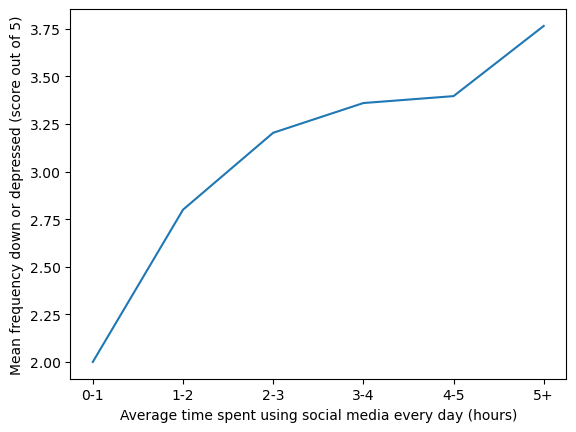

In [126]:
# Plot graph frequency using social media against frequency of feeling down
x_val = avg_summary_df["8. What is the average time in hours you spend on social media every day?"]
y_val = avg_summary_df["Mean Depressed Mood Frequency"]

plt.plot(x_val, y_val)
plt.xlabel("Average time spent using social media every day (hours)")
plt.ylabel("Mean frequency down or depressed (score out of 5)")
plt.savefig("PNGs/mood_output.png")
plt.show()

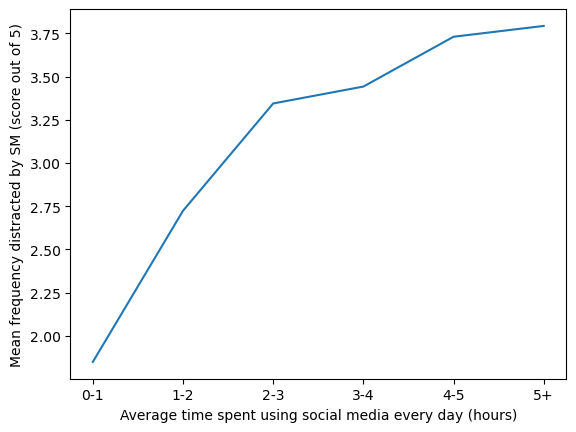

In [127]:
# Plot graph frequency using social media against frequency of being distracted by social media whilst busy doing something else
x_val = avg_summary_df["8. What is the average time in hours you spend on social media every day?"]
y_val = avg_summary_df["Mean Distracted by Social Media Frequency"]

plt.plot(x_val, y_val)
plt.xlabel("Average time spent using social media every day (hours)")
plt.ylabel("Mean frequency distracted by SM (score out of 5)")
plt.savefig("PNGs/distracted_output.png")
plt.show()

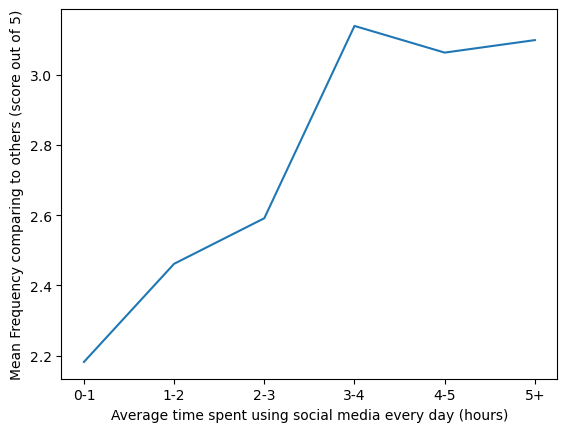

In [128]:
# Plot graph frequency using social media against frequency of time spent comparing self to others
x_val = avg_summary_df["8. What is the average time in hours you spend on social media every day?"]
y_val = avg_summary_df["Mean Comparison to Others Frequency"]

plt.plot(x_val, y_val)
plt.xlabel("Average time spent using social media every day (hours)")
plt.ylabel("Mean Frequency comparing to others (score out of 5)")
plt.savefig("PNGs/comparison_output.png")
plt.show()

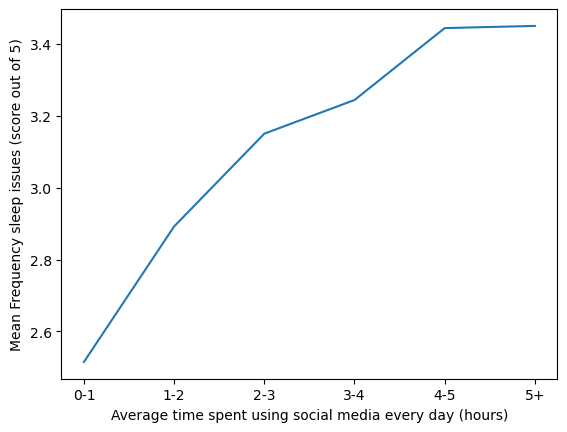

In [129]:
# Plot graph frequency using social media against frequency of having sleep issues
x_val = avg_summary_df["8. What is the average time in hours you spend on social media every day?"]
y_val = avg_summary_df["Mean Sleep Issues Frequency"]

plt.plot(x_val, y_val)
plt.xlabel("Average time spent using social media every day (hours)")
plt.ylabel("Mean Frequency sleep issues (score out of 5)")
plt.savefig("PNGs/sleep_output.png")
plt.show()